<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 20px;
    font-weight: bold;
    text-align: center;">
    ResNet Image Classification
</div>



* Resnet architecture introduces the simple concept of adding an immediate imput to the output of a series of convolution blocks. Thia is illustrated below


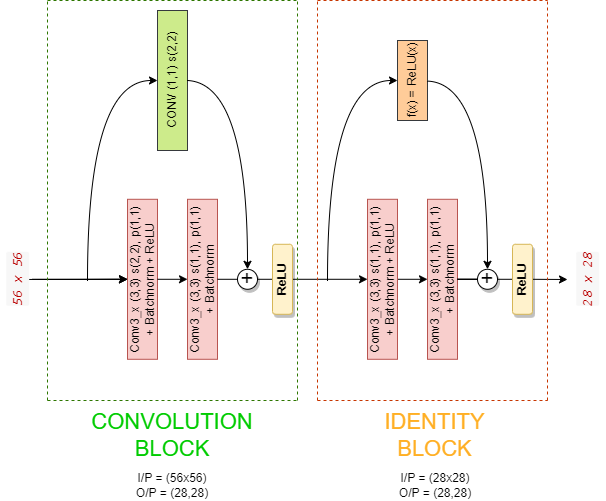

In [2]:
import os
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import UnidentifiedImageError
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet50 import decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
model = ResNet50()

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
def preedict_image(url):
    try:
        response = requests.get(url, stream=True)
        if response.status_code == 200 and 'image' in response.headers['Content-Type']:
            with open("download_image.jpg", "wb") as f:
                f.write(response.content)
        else:
            print("Invalid image URL or content type.")
            return


        img = load_img("download_image.jpg", target_size=(224, 224))
        plt.imshow(img)
        plt.axis('off')
        plt.show()


        img = img_to_array(img)
        img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
        img = preprocess_input(img)


        y_pred = model.predict(img)
        predictions = decode_predictions(y_pred, top=5)[0]


        for _, label, prob in predictions:
            print(f"{label}: {prob:.2f}")

    except UnidentifiedImageError:
        print("Failed to identify the image. Please check the URL.")

    except Exception as e:
        print(f"An error occurred: {e}")
    finally:
        if os.path.exists("download_image.jpg"):
            os.remove("download_image.jpg")


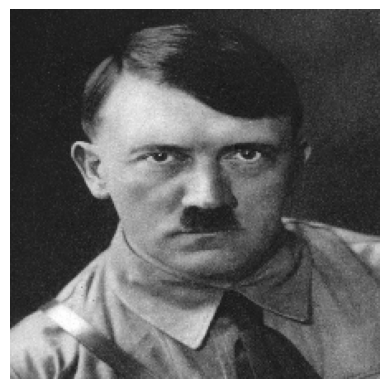

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
military_uniform: 0.87
cowboy_hat: 0.02
Band_Aid: 0.02
ping-pong_ball: 0.01
bow_tie: 0.01


In [5]:
hitler = f'https://cdn.britannica.com/58/129958-050-C0EF01A4/Adolf-Hitler-1933.jpg'
preedict_image(hitler)

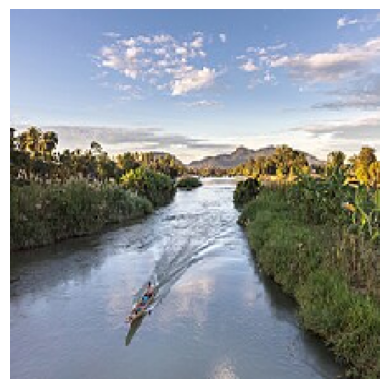

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
seashore: 0.45
lakeside: 0.26
valley: 0.14
promontory: 0.05
cliff: 0.04


In [6]:
river = f'https://upload.wikimedia.org/wikipedia/commons/thumb/7/77/Pirogue_running_on_the_Mekong_at_golden_hour_between_Don_Det_and_Don_Khon_Laos.jpg/290px-Pirogue_running_on_the_Mekong_at_golden_hour_between_Don_Det_and_Don_Khon_Laos.jpg'
preedict_image(river)

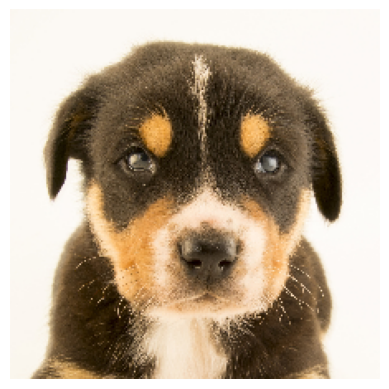

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
EntleBucher: 0.66
Appenzeller: 0.24
Rottweiler: 0.06
Greater_Swiss_Mountain_dog: 0.04
beagle: 0.00


In [8]:
dog = 'https://i.natgeofe.com/n/4f5aaece-3300-41a4-b2a8-ed2708a0a27c/domestic-dog_thumb_square.jpg'
preedict_image(dog)

In [14]:
from tensorflow.keras.utils import plot_model
plot_model(
    model,
    show_layer_names=True,
)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.863494 to fit

